# Electric Vehicle (EV) Specifications Analysis – 2025

The global shift toward electric mobility has brought a surge in new electric vehicle models with varying specifications, performance, and efficiencies. This project explores a dataset containing specifications of EVs available in 2025.

## Objective

Through exploratory data analysis (EDA), we aim to uncover patterns in:

- Battery capacity distribution
- Driving range distribution
- Relationship between battery and range
- Efficiency (km per kWh) by brand
- Insights from top brands by model count

The ultimate goal is to provide a data-driven understanding of how EV brands position themselves in terms of efficiency and performance.

_Tools: Python, Pandas, Matplotlib, Seaborn_


In [ ]:
# Basic tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter-specific
%matplotlib inline

# Optional: set seaborn theme
sns.set(style="whitegrid")

## Load and Inspect Data

We start by importing the dataset and inspecting its structure to understand the available variables and detect any potential issues with missing or inconsistent values.


In [8]:
df = pd.read_csv('../data/electric_vehicles_spec_2025.csv')
df.head()


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


### Checking column names

We inspect the column names to ensure consistency and prepare for any necessary renaming.

In [28]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'torque_nm', 'efficiency_wh_per_km', 'range_km',
       'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'fast_charge_port',
       'towing_capacity_kg', 'cargo_volume_l', 'seats', 'drivetrain',
       'segment', 'length_mm', 'width_mm', 'height_mm', 'car_body_type',
       'source_url'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

## Data Cleaning

In this step, we clean the dataset by:
- Dropping irrelevant columns.
- Renaming columns for consistency.
- Handling missing values or inconsistent entries.


In [12]:
df.describe(include='all')


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
count,478,477,478.000000,478.000000,478,276.000000,471.000000,478.000000,478.000000,478.000000,...,452.000000,477,478.000000,478,478,478.000000,478.000000,478.000000,478,478
unique,59,477,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,140,NaN,3,15,NaN,NaN,NaN,8,478
top,Mercedes-Benz,500e Convertible,NaN,NaN,Lithium-ion,NaN,NaN,NaN,NaN,NaN,...,NaN,520,NaN,AWD,JC - Medium,NaN,NaN,NaN,SUV,https://ev-database.org/car/1904/Abarth-500e-C...
freq,42,1,NaN,NaN,478,NaN,NaN,NaN,NaN,NaN,...,NaN,17,NaN,191,91,NaN,NaN,NaN,244,1
mean,NaN,NaN,185.487448,74.043724,NaN,485.293478,498.012739,162.903766,393.179916,6.882636,...,1052.261062,NaN,5.263598,NaN,NaN,4678.506276,1887.359833,1601.125523,NaN,NaN
std,NaN,NaN,34.252773,20.331058,NaN,1210.819733,241.461128,34.317532,103.287335,2.730696,...,737.851774,NaN,1.003961,NaN,NaN,369.210573,73.656807,130.754851,NaN,NaN
min,NaN,NaN,125.000000,21.300000,NaN,72.000000,113.000000,109.000000,135.000000,2.200000,...,0.000000,NaN,2.000000,NaN,NaN,3620.000000,1610.000000,1329.000000,NaN,NaN
25%,NaN,NaN,160.000000,60.000000,NaN,150.000000,305.000000,143.000000,320.000000,4.800000,...,500.000000,NaN,5.000000,NaN,NaN,4440.000000,1849.000000,1514.000000,NaN,NaN
50%,NaN,NaN,180.000000,76.150000,NaN,216.000000,430.000000,155.000000,397.500000,6.600000,...,1000.000000,NaN,5.000000,NaN,NaN,4720.000000,1890.000000,1596.000000,NaN,NaN
75%,NaN,NaN,201.000000,90.600000,NaN,324.000000,679.000000,177.750000,470.000000,8.200000,...,1600.000000,NaN,5.000000,NaN,NaN,4961.000000,1939.000000,1665.000000,NaN,NaN


In [15]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum().sort_values(ascending=False)

number_of_cells              202
towing_capacity_kg            26
torque_nm                      7
fast_charge_port               1
fast_charging_power_kw_dc      1
model                          1
cargo_volume_l                 1
seats                          0
car_body_type                  0
height_mm                      0
width_mm                       0
length_mm                      0
segment                        0
drivetrain                     0
brand                          0
acceleration_0_100_s           0
range_km                       0
efficiency_wh_per_km           0
battery_type                   0
battery_capacity_kWh           0
top_speed_kmh                  0
source_url                     0
dtype: int64

### Dropping `number_of_cells`

This column contains technical battery information but is missing in nearly half of the entries. Since it's not critical to our analysis, we remove it to simplify the dataset.


In [19]:
df['number_of_cells'].value_counts(dropna=False)

number_of_cells
NaN       202
288.0      44
96.0       21
216.0      21
396.0      21
324.0      17
192.0      16
180.0      16
102.0      15
384.0      12
360.0       7
118.0       6
312.0       6
376.0       6
300.0       5
204.0       5
110.0       5
104.0       5
4416.0      5
150.0       4
184.0       4
172.0       4
456.0       4
7920.0      4
93.0        3
108.0       3
5400.0      2
72.0        2
90.0        2
126.0       2
348.0       1
6600.0      1
432.0       1
264.0       1
160.0       1
132.0       1
128.0       1
94.0        1
112.0       1
Name: count, dtype: int64

In [ ]:
df.drop(columns=['number_of_cells'], inplace=True)

In [22]:
# Top 15 marcas con más modelos registrados
df['brand'].value_counts().head(15)


brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             22
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Kia              16
Opel             14
Hyundai          14
Skoda            12
MG               12
Name: count, dtype: int64

### Brand Distribution

We begin by analyzing the number of electric vehicle models offered by each brand in the dataset. This allows us to identify which manufacturers are the most active in the EV market as of 2025.

The chart below shows the top 15 brands by model count.


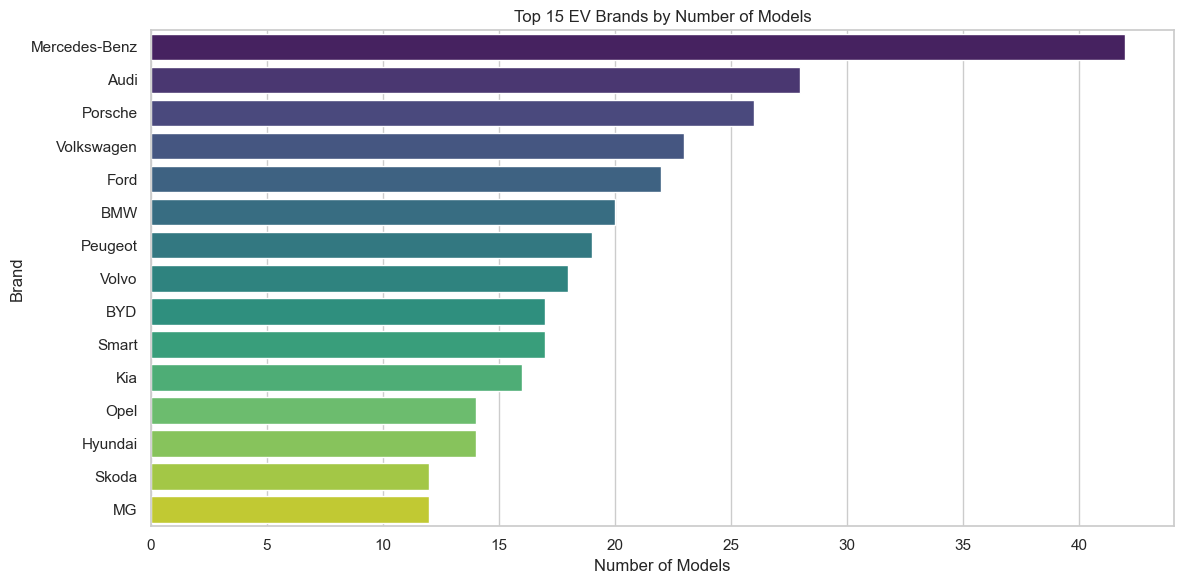

In [26]:
plt.figure(figsize=(12,6))
top_brands = df['brand'].value_counts().head(15)
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.title('Top 15 EV Brands by Number of Models')
plt.xlabel('Number of Models')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


Mercedes-Benz leads the dataset with over 40 electric vehicle models, followed by Audi and Porsche. This highlights a strong presence of German manufacturers in the EV market.

Interestingly, brands like BYD and Smart also appear in the top 15, showing that both luxury and budget segments are expanding. The variety in the number of models suggests that some brands are aggressively diversifying their EV offerings, while others are more conservative.

This distribution sets the stage for further analysis: are more models linked to better performance, greater range, or faster charging?


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


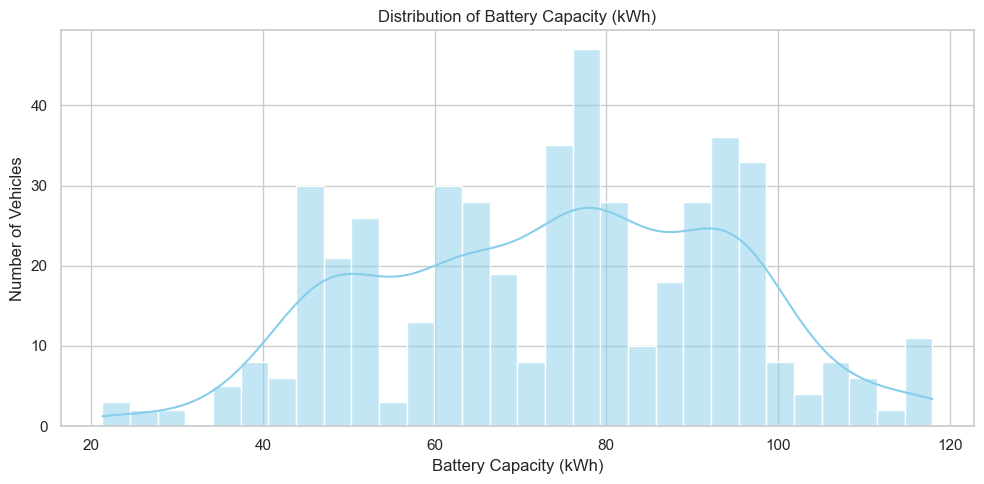

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df['battery_capacity_kWh'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Battery Capacity (kWh)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()


### Battery Capacity Distribution

Battery size is a core feature of electric vehicles, directly influencing range, weight, and charging behavior.

Most vehicles in the dataset have a battery between 50 and 100 kWh, with a peak around the 75–80 kWh range. This aligns with the capacities offered by mid-range and premium EVs on the market today. A smaller group of vehicles falls below 40 kWh, likely representing compact or city-focused models.

This spread highlights the diversity in the EV market, serving different customer needs and usage patterns.


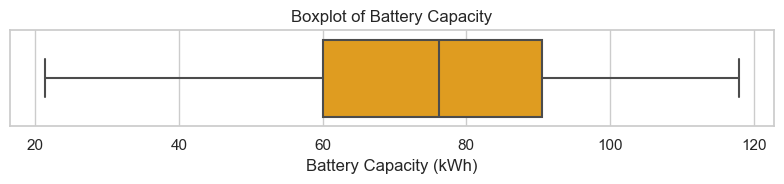

In [31]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['battery_capacity_kWh'], color='orange')
plt.title('Boxplot of Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.tight_layout()
plt.show()


The boxplot further confirms the central tendency of battery capacities around 75 kWh, with most vehicles ranging between 60 and 90 kWh.

Interestingly, there are no extreme outliers, which indicates a relatively consistent trend among available models, possibly reflecting standardization efforts in the industry.


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


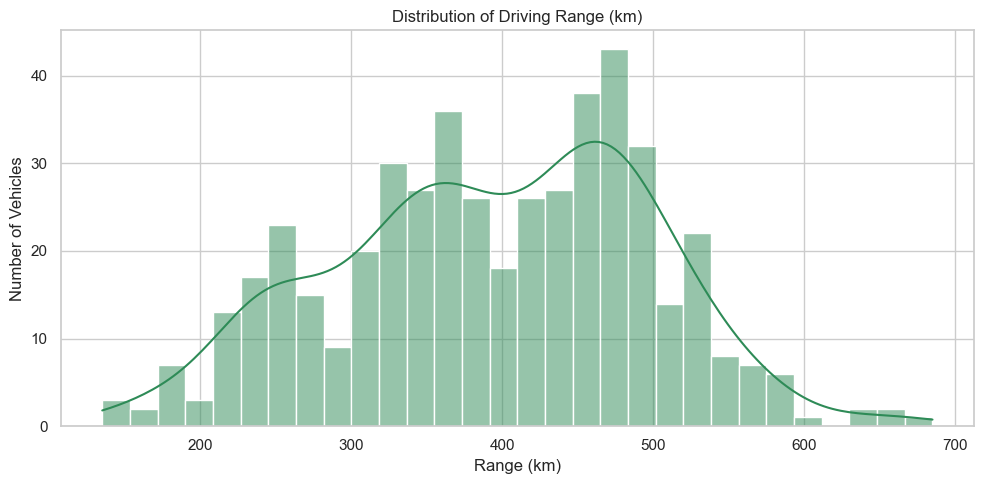

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df['range_km'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Driving Range (km)')
plt.xlabel('Range (km)')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()


### Driving Range Distribution

The histogram shows that most electric vehicles in 2025 offer a driving range between 300 and 500 km, with a noticeable concentration around the 450 km mark.

Only a few models fall below 200 km — likely compact city EVs — while very few exceed the 600 km threshold, suggesting that ultra-long range remains uncommon.

This distribution reflects the maturity of EV technology: offering sufficient range for daily use while balancing cost, weight, and battery size.


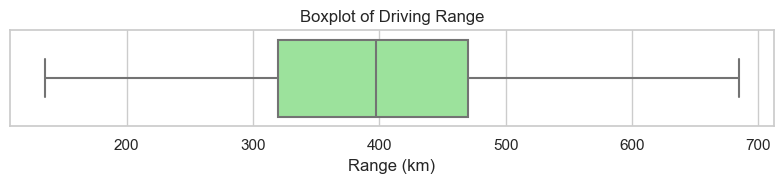

In [34]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['range_km'], color='lightgreen')
plt.title('Boxplot of Driving Range')
plt.xlabel('Range (km)')
plt.tight_layout()
plt.show()


The boxplot of driving range confirms that 50% of electric vehicles fall between approximately 325 and 475 km of range, with the median close to 400 km. This suggests that the typical EV in 2025 is designed to comfortably meet daily and intercity driving needs.

The relatively wide interquartile range (IQR) indicates that manufacturers are offering varied solutions depending on vehicle type and market segment. No strong outliers appear in the data, suggesting that most ranges fit within expected performance boundaries.


C:\Users\user\AppData\Local\Temp\ipykernel_15680\2109510151.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


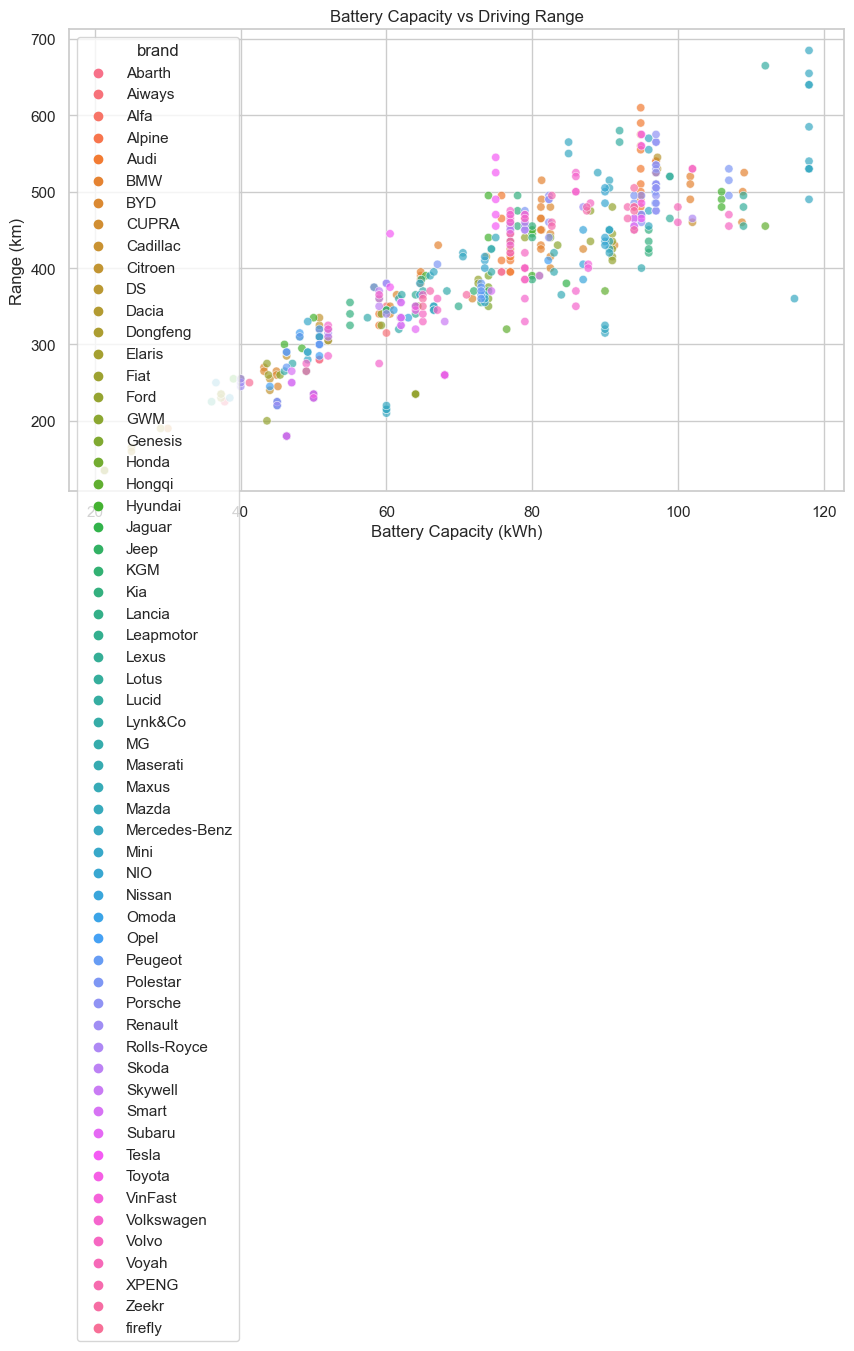

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='battery_capacity_kWh',
    y='range_km',
    hue='brand',  # Puedes eliminar esta línea si hay muchas marcas y se satura
    alpha=0.7
)
plt.title('Battery Capacity vs Driving Range')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.tight_layout()
plt.show()


### Battery vs Range

This scatterplot confirms a strong positive relationship between battery capacity and driving range, as expected. However, not all vehicles are equally efficient.

Some models achieve over 450 km of range with batteries around 70–80 kWh, while others require over 100 kWh to reach similar distances. This variation highlights differences in weight, aerodynamics, and energy optimization strategies across manufacturers.

To better understand brand-specific behavior, a focused analysis on top brands will be conducted next.


## Focus on Top 10 EV Brands (by Model Count)

We narrow our analysis to the top 10 brands with the highest number of EV models in the dataset. This helps us compare the performance and efficiency of the most prevalent manufacturers.


In [37]:
# Obtener las 10 marcas con más modelos
top_10_brands = df['brand'].value_counts().head(10).index
top_10_brands

Index(['Mercedes-Benz', 'Audi', 'Porsche', 'Volkswagen', 'Ford', 'BMW',
       'Peugeot', 'Volvo', 'BYD', 'Smart'],
      dtype='object', name='brand')

In [38]:
df_top_brands = df[df['brand'].isin(top_10_brands)]


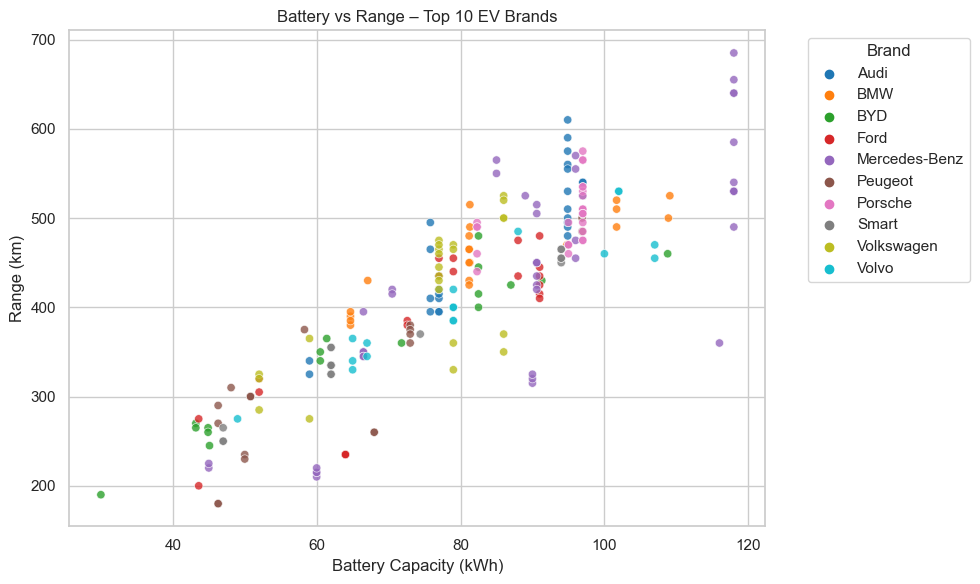

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_top_brands,
    x='battery_capacity_kWh',
    y='range_km',
    hue='brand',
    palette='tab10',  # paleta con máximo 10 colores bien diferenciados
    alpha=0.8
)
plt.title('Battery vs Range – Top 10 EV Brands')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Efficiency Comparison – Top 10 EV Brands

When focusing on the top 10 brands, the relationship between battery capacity and driving range becomes much clearer.

Porsche and Mercedes-Benz stand out by delivering high range values with relatively moderate battery sizes, indicating excellent energy efficiency and likely superior aerodynamic design.

On the other hand, brands like Smart and Ford display more variation, with several models showing lower range than expected for their battery size, suggesting less optimized efficiency or design priorities focused on cost or urban use.

This comparison highlights how not all batteries are used equally and how design choices impact real-world performance.

In [40]:
# Crear una nueva columna con la eficiencia (km por kWh)
df['efficiency_km_per_kwh'] = df['range_km'] / df['battery_capacity_kWh']


In [41]:
# Agrupar por marca y calcular media de eficiencia
efficiency_by_brand = df.groupby('brand')['efficiency_km_per_kwh'].mean().sort_values(ascending=False)
efficiency_by_brand.head(10)


brand
Dacia       6.500000
Dongfeng    6.463362
Lancia      6.444906
Tesla       6.239493
Fiat        6.227409
Alfa        6.200787
Lucid       6.127717
firefly     6.067961
Mini        6.065516
Skoda       5.950859
Name: efficiency_km_per_kwh, dtype: float64

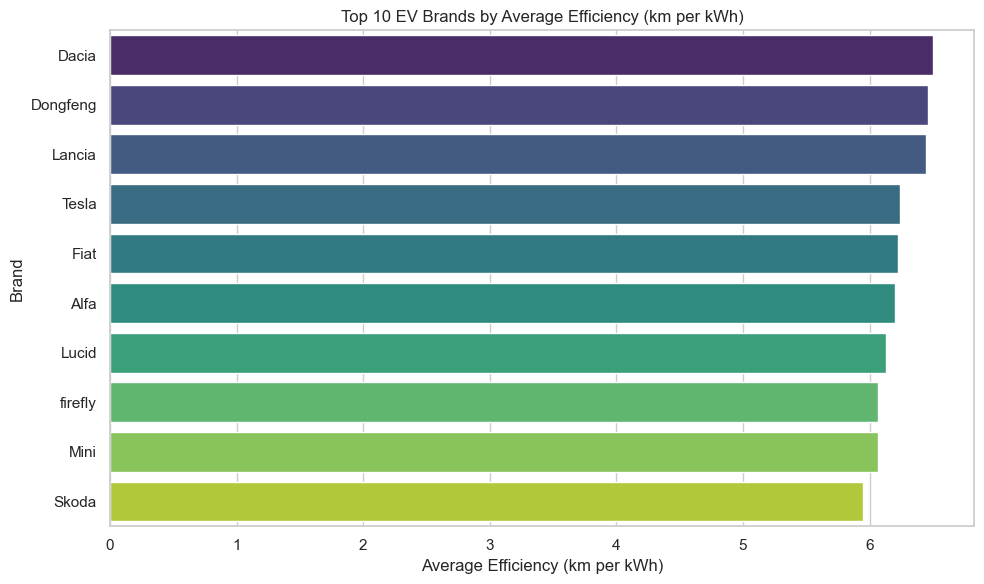

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=efficiency_by_brand.head(10),
    y=efficiency_by_brand.head(10).index,
    palette='viridis'
)
plt.title('Top 10 EV Brands by Average Efficiency (km per kWh)')
plt.xlabel('Average Efficiency (km per kWh)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


### Top EV Brands by Energy Efficiency

When measuring efficiency as range per unit of battery capacity (km/kWh), the top-performing brands differ significantly from those with the most models or longest ranges.

Brands like Dacia, Dongfeng, and Lancia lead in energy efficiency, likely due to lightweight, compact designs and simpler configurations. Tesla and Lucid also score highly, reflecting their investment in powertrain optimization.

This metric highlights that high range alone doesn't imply efficiency — how the battery is used matters just as much.


In [44]:
top_10_brands = df['brand'].value_counts().head(10).index
df_top10 = df[df['brand'].isin(top_10_brands)]

In [45]:
top10_efficiency = df_top10.groupby('brand')['efficiency_km_per_kwh'].mean().sort_values(ascending=False)

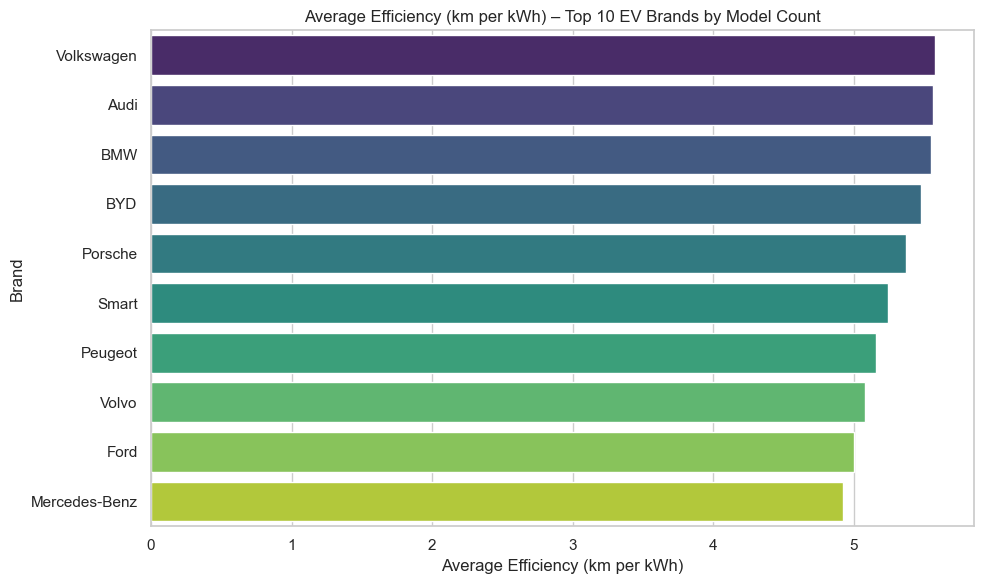

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top10_efficiency,
    y=top10_efficiency.index,
    palette='viridis'
)
plt.title('Average Efficiency (km per kWh) – Top 10 EV Brands by Model Count')
plt.xlabel('Average Efficiency (km per kWh)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

### Efficiency within Market Leaders

Among the top 10 brands by model count, Volkswagen, Audi, and BMW lead in energy efficiency, each averaging slightly above 5 km per kWh. This suggests a strong balance between performance and optimization in their EV lineups.

Interestingly, Mercedes-Benz, despite being the brand with the most models, ranks lowest in efficiency. This could reflect a design strategy centered on luxury and power over range optimization.

Overall, most major brands cluster closely around the 5 km/kWh mark, indicating that while their strategies differ, the technological standards are converging around a common efficiency threshold.

## Conclusions

This analysis of 2025 electric vehicle specifications revealed several key insights:

- **Battery vs. Range**: There is a strong positive correlation between battery capacity and driving range. However, the relationship is not uniform across all models — energy efficiency varies significantly by manufacturer.

- **Market Leaders**: Brands such as Mercedes-Benz, Audi, and Volkswagen offer a high number of EV models, but not all of them are optimized for energy usage. Quantity does not always equate to efficiency.

- **Efficiency Outperformers**: Less prominent brands like Dacia and Lancia stand out for their high energy efficiency, achieving over 6 km per kWh. This suggests a focus on compact, lightweight vehicles with optimized designs.

- **Top 10 Brands by Volume**: Among the most represented brands, Volkswagen, Audi, and BMW lead in average efficiency, striking a balance between size, performance, and energy optimization. Conversely, Mercedes-Benz, despite having the most models, ranked lowest in efficiency within this group.

Overall, the findings highlight that **battery size alone does not determine vehicle performance**. Efficiency is shaped by a combination of design choices, weight, drivetrain technology, and brand priorities.

